# Importing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/mars/RudolphineTables.csv", index_col = "index")
df

,ANOMALIA COEQUATA,INTERVALLU
index,,
0,0.0.0,166465
1,0.54.41,166462
2,1.49.22,166456
3,2.44.3,166446
4,3.38.44,166431
...,...,...
176,175.36.39,138269
177,176.42.29,138254
178,177.48.19,138244


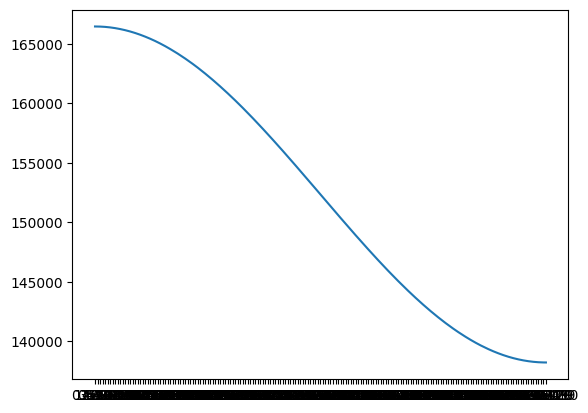

In [3]:
import matplotlib.pyplot as plt
plt.plot(df["ANOMALIA COEQUATA"].values, df["INTERVALLU"].values)

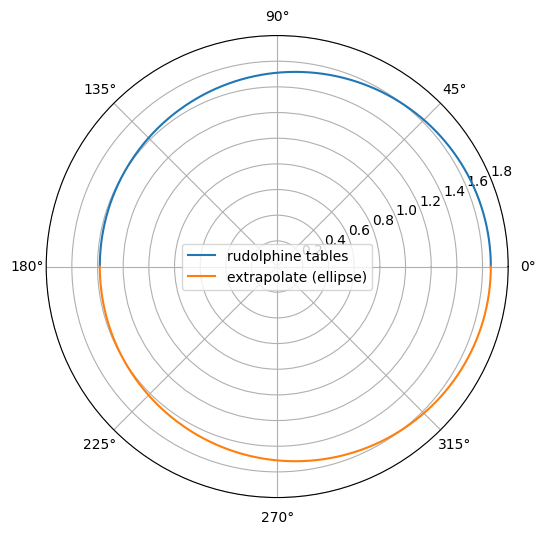

In [4]:
def dsm_to_deg(s):
  value0 = s.find(".")
  value1 = s[value0+1:].find(".")
  return float(s[:value0]) + float(s[value0+1:value0+value1+1])/60 + float(s[value0+value1+2:])/3600

longitudinal_data = np.asarray(list(map(dsm_to_deg,df["ANOMALIA COEQUATA"].values)))/360*2*np.pi
radius_data = df["INTERVALLU"].values/100000

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='polar')
c = ax.plot(longitudinal_data, radius_data, label = "rudolphine tables")
c = ax.plot(longitudinal_data*-1, radius_data, label = "extrapolate (ellipse)")
ax.set_ylim(0,1.8)
plt.legend()

In [5]:
# what value of eccentricity does the data suggest?
from scipy.optimize import curve_fit
import numpy as np

def ecc(theta, p, e): #try to fit p and e
  return p/(1+e*np.cos(theta))

values,cov = curve_fit(ecc, longitudinal_data, radius_data, p0 = [150000, 0.1]) # requires good initialisation points
print(values)

#from https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#recognised orbit eccentricitty is 0.0935 
#recognised semimajor axis is 1.5266 
#note that the value of eccentricity we get is negative because of the setup of the ellipse

[ 1.51042379 -0.09264712]


In [6]:
print(values[1], values[0]/(1-values[1]**2))

-0.09264712243088387 1.5235007450606302


In [ ]:
# average percentage error in fitting the eccentricity and semimajor axis
# the loss in using this formula to fit the data is 
result = ecc(longitudinal_data, values[0], values[1])
pcterror = (np.abs(result - radius_data)/radius_data)
print(np.mean(pcterror))

5.13333352231232e-06


In [ ]:
rmin = values[0]/(1+values[1])
rmax = values[0]/(1-values[1])
semimajoraxis = values[0]/(1-values[1]**2)
semiminoraxis = values[0]/np.sqrt(1-values[1]**2)

print(rmin, rmax, semimajoraxis,semiminoraxis)

1.664648705111805 1.3823527850094552 1.5235007450606302 1.51694817761639


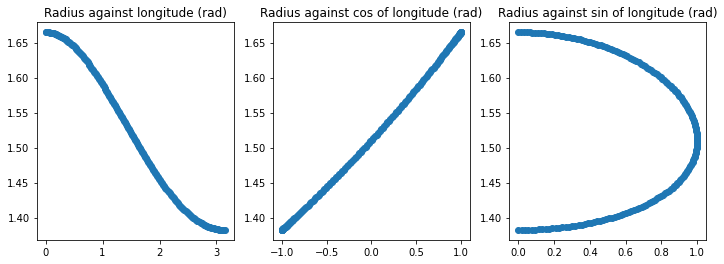

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4))
ax1.scatter(longitudinal_data, radius_data)
ax1.set_title("Radius against longitude (rad)")
ax2.scatter(np.cos(longitudinal_data), radius_data)
ax2.set_title("Radius against cos of longitude (rad)")
ax3.scatter(np.sin(longitudinal_data), radius_data)
ax3.set_title("Radius against sin of longitude (rad)")
plt.show()

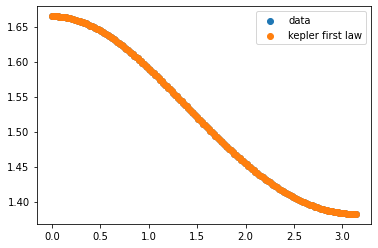

In [ ]:
plt.scatter(longitudinal_data, radius_data, label = "data")
plt.scatter(longitudinal_data, ecc(longitudinal_data, values[0], values[1]), label = "kepler first law")
plt.legend()
plt.show()
# this shows that kepler's first law doesnt fit well

# Importing AI Feynman

In [ ]:
!git clone https://github.com/zykhoo/AI-Feynman.git 

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 81 (delta 7), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (81/81), 14.32 MiB | 10.38 MiB/s, done.


In [ ]:
import matplotlib.pyplot as plt
!pip install matplotlib-label-lines
from labellines import labelLine, labelLines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi

!lsb_release -a

!python3 --version

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal
Python 3.9.16


Look at what we downloaded

In [ ]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

aifeynman     examples	MANIFEST.in  requirements.txt  setup.py
example_data  LICENSE	README.md    setup.cfg


Fix broken requirements file (may not be needed if later versions fix this).

In [ ]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [ ]:
!pip install -r AI-Feynman/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


Check that fortran is installed

In [ ]:
!gfortran --version

GNU Fortran (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


Install the csh shell

In [ ]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 243 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 csh amd64 20110502-5 [243 kB]
Fetched 243 kB in 1s (395 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 128275 files and directories currently installed.)

Set loose permissions to avoid some reported file permissions issues

In [ ]:
!chmod +777 /content/AI-Feynman/aifeynman/*

Compile the fortran code

Look at the code directory

In [ ]:
!ls -l /content/AI-Feynman/aifeynman

total 1304
-rwxrwxrwx 1 root root     11 Mar 15 11:16 10ops.txt
-rwxrwxrwx 1 root root     15 Mar 15 11:16 14ops.txt
-rwxrwxrwx 1 root root     19 Mar 15 11:16 19ops.txt
-rwxrwxrwx 1 root root      8 Mar 15 11:16 7ops.txt
-rwxrwxrwx 1 root root 960508 Mar 15 11:16 arity2templates.txt
-rwxrwxrwx 1 root root   4297 Mar 15 11:16 dimensionalAnalysis.py
-rwxrwxrwx 1 root root    952 Mar 15 11:16 get_demos.py
-rwxrwxrwx 1 root root   6168 Mar 15 11:16 get_pareto.py
-rwxrwxrwx 1 root root   1745 Mar 15 11:16 getPowers.py
-rwxrwxrwx 1 root root    247 Mar 15 11:16 __init__.py
-rwxrwxrwx 1 root root    155 Mar 15 11:16 resources.py
-rwxrwxrwx 1 root root   2395 Mar 15 11:16 RPN_to_eq.py
-rwxrwxrwx 1 root root   5205 Mar 15 11:16 RPN_to_pytorch.py
-rwxrwxrwx 1 root root   5383 Mar 15 11:16 S_add_bf_on_numbers_on_pareto.py
-rwxrwxrwx 1 root root   7908 Mar 15 11:16 S_add_snap_expr_on_pareto.py
-rwxrwxrwx 1 root root    990 Mar 15 11:16 S_add_sym_on_pareto.py
-rwxrwxrwx 1 root root   1540 Mar 15 1

Compile .f files into .x files

In [ ]:
import os
os.chdir("/content/AI-Feynman/") #&& ./compile.sh
!ls
!python3 /content/AI-Feynman/setup.py install


Streaming output truncated to the last 5000 lines.
aifeynman/symbolic_regress2.f90:197:1:

  197 |    arity = arities(i)
      | 1
aifeynman/symbolic_regress2.f90:198:1:

  198 |    op = ops(i:i)
      | 1
aifeynman/symbolic_regress2.f90:199:1:

  199 |    if (arity.eq.0) then ! This is a nonary function
      | 1
aifeynman/symbolic_regress2.f90:200:1:

  200 |      if (op.eq."0") then
      | 1
aifeynman/symbolic_regress2.f90:202:1:

  202 |      else if (op.eq."1") then
      | 1
aifeynman/symbolic_regress2.f90:203:1:

  203 |        y = 1.
      | 1
aifeynman/symbolic_regress2.f90:204:1:

  204 |      else if (op.eq."P") then
      | 1
aifeynman/symbolic_regress2.f90:205:2:

  205 |         y = 4.*atan(1.) ! pi
      |  1
aifeynman/symbolic_regress2.f90:207:5:

  207 |            y = x(ichar(op)-96)
      |     1
aifeynman/symbolic_regress2.f90:208:1:

  208 |      end if
      | 1
aifeynman/symbolic_regress2.f90:209:1:

  209 |    else if (arity.eq.1) then ! This is a unary functio

# Creating the dataset for AI Feynman and running AI Feynman

## Attempt 2 with modified dataset, only include x_0 = cos(longi), x1 = sin(longi) to try and recover equation form


In [ ]:
data_sincos = pd.DataFrame()
data_sincos['longi'] = longitudinal_data
data_sincos['radius'] = radius_data
data_sincos['cos_longi'] = np.cos(data_sincos['longi'])
data_sincos['sin_longi'] = np.sin(data_sincos['longi'])
data_sincos = data_sincos.sample(frac=1).reset_index(drop=True)

np.savetxt('/content/AI-Feynman/example_data/data_cossin1.txt', data_sincos[[ "cos_longi", "sin_longi", "radius"]].sample(frac=1).values)
np.loadtxt('/content/AI-Feynman/example_data/data_cossin1.txt')

array([[-2.57540376e-01,  9.66267538e-01,  1.47523000e+00],
       [-5.23663784e-01,  8.51925021e-01,  1.44055000e+00],
       [-5.39244481e-01,  8.42149268e-01,  1.43857000e+00],
       [ 5.10292775e-01,  8.60000746e-01,  1.58537000e+00],
       [ 3.27231643e-01,  9.44944153e-01,  1.55765000e+00],
       [ 4.51578437e-01,  8.92231425e-01,  1.57637000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.66465000e+00],
       [-9.47612114e-01,  3.19423357e-01,  1.38852000e+00],
       [ 1.09922245e-01,  9.93940189e-01,  1.52596000e+00],
       [-8.08868786e-01,  5.87989189e-01,  1.40513000e+00],
       [-1.70252496e-01,  9.85400471e-01,  1.48697000e+00],
       [-9.99816642e-01,  1.91489699e-02,  1.38237000e+00],
       [-5.54658876e-01,  8.32077840e-01,  1.43661000e+00],
       [-6.57539632e-01,  7.53419957e-01,  1.42370000e+00],
       [ 7.71701673e-01,  6.35984692e-01,  1.62674000e+00],
       [-8.30466286e-01,  5.57068890e-01,  1.40252000e+00],
       [-2.05283769e-01,  9.78702495e-01

In [ ]:
import os
os.chdir("/content/AI-Feynman/")
print(os.getcwd())

/content/AI-Feynman


In [ ]:
! rm -r /content/AI-Feynman/results

rm: cannot remove '/content/AI-Feynman/results': No such file or directory


In [ ]:
from aifeynman.S_run_aifeynman import run_aifeynman
import time

start = time.time()
run_aifeynman("/content/AI-Feynman/example_data/","data_cossin1.txt",30,"7ops.txt", bias=[1,1,1,0,1,0,1,1,1,1,1], polyfit_deg=1, NN_epochs=400)
end = time.time()

Checking for brute force + 

/content/AI-Feynman/example_data/ data_cossin1.txt_train
Trying to solve mysteries with brute force...
Trying to solve /content/AI-Feynman/example_data/data_cossin1.txt_train
1A added  22.53943147215541 26.072050064309487 1.523500000000+0
1A added  57.50137828110914 25.463776004167546 0.498057755006+sqrt(sqrt((x0+1)))
1A added  57.30123822565131 23.76613074005739 0.108385592313+sqrt((sqrt((x0+1))+1))
1A added  57.53038862615934 23.203665313918812 0.338782861287+sqrt(sqrt(((x0+1)+1)))
1A added  62.52399061939606 21.86364545487463 2.698270136045+(-sqrt(sqrt((((-x0)+1)+1))))
1A added  62.52399061939606 21.86364545487463 3.698270136045+(-(sqrt(sqrt((((-x0)+1)+1)))+1))
1A added  58.909857945327815 20.94726590718851 1.511006320056+(x0/((((((x1+1)+1)+1)+1)+1)+1))
1B added  47.11594531527561 26.1850433438588 1.52515089511871
1B added  140.41741287084471 24.494531851773313 (x0 + 1.12736093997955)**0.114460319280624 + 0.53428316116333
1B added  232.47905849235957 24.

In [ ]:
print(end - start)

1183.5979816913605


In [ ]:
!cat /content/AI-Feynman/results/solution_data_cossin1.txt

26.299067121443652 4.709385743377121 852.3988195512588 3.0 26.16172461827567 1.50000000000000
24.07439188119506 4.587852395736082 830.4012836282309 11.562242424221072 24.048123124128196 0.142857142857143*x0 + 1.5
23.59052054911872 4.561731208134521 825.6733486723483 14.807354922057604 23.616630011790516 x0/(x1 + 6) + 1.5
23.37575612948125 4.547962780401471 823.1812632526662 53.74165074261021 23.392315676222196 acos(0.0420224035468255 - 0.142857142857143*x0)
22.60905164545021 4.496632813243991 813.8905391971624 54.53572911191546 22.574667183977166 1/(0.666666666666667 - 0.0566732120453772*x0)
21.24950190265037 4.388690046709359 794.3528984543939 58.909857945327815 20.94726590718851 1.511006320056+(x0/((((((x1+1)+1)+1)+1)+1)+1))
20.090178795274163 4.325613004579711 782.9359538289277 96.4376263296123 20.051148989454767 tan(0.0425049090340329*x0 + 0.986141372332807)
19.960587676602366 4.323415529021175 782.5382107528327 96.44680498018116 20.020630849008718 tan(0.0427569970488548*x0 + 0.986

Equation 2: 0.142857142857143*x0 + 1.5
Equation 3: x0/(x1 + 6) + 1.5
Equation 4: np.arccos(0.0420224035468255 - 0.142857142857143*x0)
Equation 5: 1/(0.666666666666667 - 0.0566732120453772*x0)
Equation 6: 1.511006320056+(x0/((((((x1+1)+1)+1)+1)+1)+1))
Equation 7: np.tan(0.0425049090340329*x0 + 0.986141372332807)
Equation 8: np.tan(0.0427569970488548*x0 + 0.98658412694931)
Equation 9: 1/(0.662420213222504 - 0.0612917765974998*x0)
Equation 10: (0.662420213222504 - 0.0612917765974998*x0)**(-1.00130701065063)


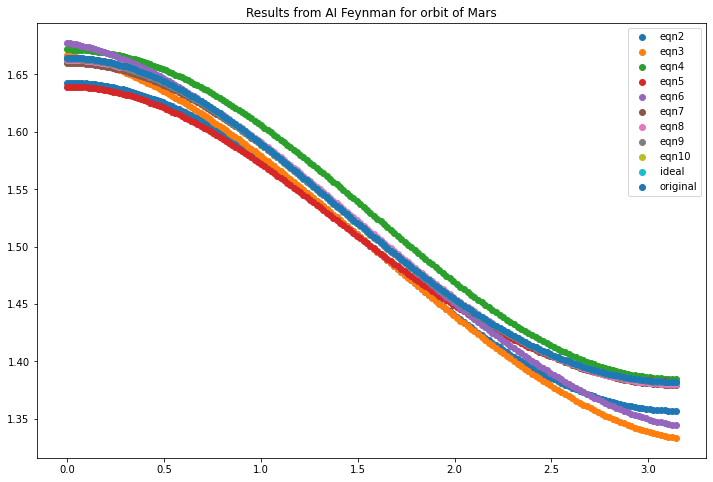

In [ ]:
from aifeynman.S_get_symbolic_expr_error import get_symbolic_expr_error

plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string
  
with open("/content/AI-Feynman/results/solution_data_cossin1.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","data_sincos['cos_longi'].values")
      equation = equation.replace("x1","data_sincos['sin_longi'].values")
      equation = equation.replace("x2","data_sincos['1cos_longi'].values")
      equation = equation.replace("x3","data_sincos['1sin_longi'].values")
      try: 
            output = list(eval(equation))
            plt.scatter(data_sincos['longi'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else: 
      continue

plt.scatter(longitudinal_data, ecc(longitudinal_data, values[0], values[1]), label = "ideal")      
plt.scatter(data_sincos['longi'],data_sincos['radius'], label = "original")

# labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

1 & $1.50000000000000$ & 0.0106 & 26.186
2 & $0.142857142857143\times x_0 + 1.5$ & 0.000309 & 24.053
3 & $x_0/(x_1 + 6) + 1.5$ & 0.000416 & 23.617
4 & $acos(0.0420224035468255 - 0.142857142857143\times x_0)$ & 0.000161 & 23.392
5 & $1/(0.666666666666667 - 0.0566732120453772\times x_0)$ & 0.000227 & 22.575
6 & $1.511006320056+(x_0/((((((x_1+1)+1)+1)+1)+1)+1))$ & 0.000178 & 21.089
7 & $tan(0.0425049090340329\times x_0 + 0.986141372332807)$ & 4.96e-06 & 20.057
8 & $tan(0.0427569970488548\times x_0 + 0.98658412694931)$ & 1.98e-06 & 20.021
9 & $1/(0.662420213222504 - 0.0612917765974998\times x_0)$ & 7.42e-07 & 19.747
10 & $(0.662420213222504 - 0.0612917765974998\times x_0)^(-1.00130701065063)$ & 6.01e-10 & 12.208


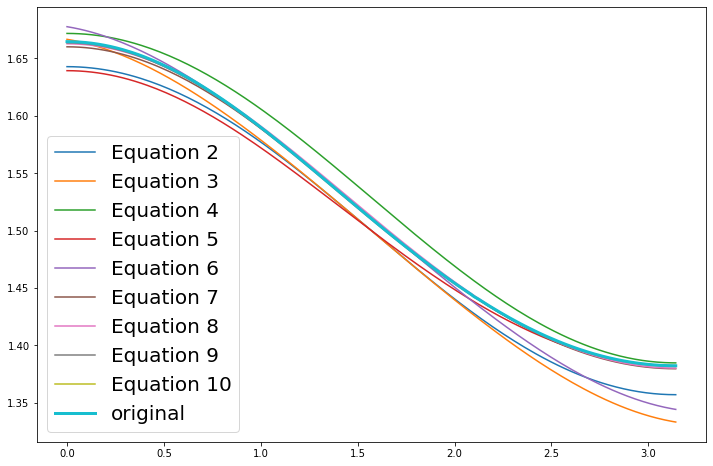

In [ ]:
import re

plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string
  
def pretty_print_eqn(s):
  return s.replace("\n", "").replace("x0", "x_0").replace("x1", "x_1").replace("**", "^").replace("*", "\\times ")

with open("/content/AI-Feynman/results/solution_data_cossin1.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    eq = replace_equations(equation.replace("\n", ""))
    if ("x0" in eq) & ("np.pi" not in eq) or ("x1" in eq) or ("x2" in eq):
      eq = eq.replace("x0","np.cos(longitudinal_data)")
      eq = eq.replace("x1","np.sin(longitudinal_data)")
      eq = eq.replace("x2","data_sincos['1cos_longi'].values")
      eq = eq.replace("x3","data_sincos['1sin_longi'].values")
      try: 
            output = list(eval(eq))
            plt.plot(longitudinal_data,
                    output, label = "Equation %s" %count)
            print("%s & $%s$ & %.3g & %.5g" %(count, pretty_print_eqn(equation), np.mean((np.asarray(output)-radius_data)**2), 
                                              get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/data_cossin1.txt"),str(equation.replace("\n", "")))))
      except Exception as e:
        print(e)
    else: 
      try: 
            output = [float(eval(eq))]*len(radius_data)
            # plt.plot(data_original['longi'],
            #         output, label = "eqn%s" %count)
            print("%s & $%s$ & %.3g & %.5g" %(count, pretty_print_eqn(equation), np.mean((np.asarray(output)-radius_data)**2), 
                                              get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/data_cossin1.txt"),str(equation.replace("\n", "")))))
      except Exception as e:
        print(e)
      continue

plt.plot(longitudinal_data, radius_data, label = "original", linewidth=3)   
# labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend(fontsize=20)
# plt.title("Results from AI Feynman for orbit of Mars")
# plt.xlabel("longitude")
# plt.ylabel("radius")
plt.show()